In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [118]:

df = pd.read_csv(r'C:\Users\hp\Downloads\telecos customer churn 2\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

1. We have customer information for a Telecommunications company
2. We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has **churnded** 
**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)


customer churn 

churn is when an existing customer , user , subscriber or clint stops doing bussiness or ends the relationship with company

Aim

our aim is to figure out which cutomers are likely to churn in 
future

Inspiration

To explore this type of models and learn more about the subject.



In [119]:
df.shape  ## 7043 rows and 21 columnns

(7043, 21)

In [120]:
## gatering information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [121]:
## data seems to have no null values . 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [122]:
## lets look at description ,  5 point summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [123]:
## only 3 columns are numerical and rest of the columns out of 21 are categorical 
# average number of months customer takes the subscription is 32.3 months and max tenure is 72 months
#average monthly charge he/she pays 64.76 dollars and maximum is 118.75
# seniorCitizen is a binary feild i.e 0 or 1  we can see from above

In [124]:
 # numer of unique values in our dataset
print('Unique Values in dataset :' ,'\n' , df.nunique() )

Unique Values in dataset : 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [125]:
## now lets look at our Target columns
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [126]:
df1 = df.copy()

### Exploratory Data Analysis

In [127]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [128]:
df1 = df1.drop(['customerID' ,'MonthlyCharges' , 'TotalCharges' , 'tenure' , ] , axis =1 )

In [129]:
df1['Dependents']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [130]:
pd.set_option('display.max_rows', 500)

In [131]:
  ## creating a summary by targeting churn column as our target column
  # and using rest of the clumns to count a frquency for their subcategory 
summary  =pd.concat([pd.crosstab(df1[x] , df1.Churn) for x in df1.columns[:-1]] , keys  = df1.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [132]:
##   did samething with the loop
sumr =[]
for i  in  df1.columns[:-1]:
    a  =  pd.crosstab(  df1[i] , df1.Churn )
    
    sumr.append(a)
    
sumr = pd.concat(sumr , keys = df1.columns[:-1])  
sumr

## from  this we can see the frequancy of various categorical columns for churn category

  


Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [133]:
## we can drop  the tenure column

In [134]:
# now lets make the column for percentaege percentage of yes in each category 
sumr['churn_percent'] = sumr['Yes']/(sumr['No']+ sumr['Yes'])
sumr


Churn                                         No   Yes  churn_percent
gender           Female                     2549   939       0.269209
                 Male                       2625   930       0.261603
SeniorCitizen    0                          4508  1393       0.236062
                 1                           666   476       0.416813
Partner          No                         2441  1200       0.329580
                 Yes                        2733   669       0.196649
Dependents       No                         3390  1543       0.312791
                 Yes                        1784   326       0.154502
PhoneService     No                          512   170       0.249267
                 Yes                        4662  1699       0.267096
MultipleLines    No                         2541   849       0.250442
                 No phone service            512   170       0.249267
                 Yes                        2121   850       0.286099
InternetService  DSL                        1962   459       0.189591
                 Fiber optic                1799  1297       0.418928
                 No                         1413   113       0.074050
OnlineSecurity   No                         2037  1461       0.417667
                 No internet service        1413   113       0.074050
                 Yes                        1724   295       0.146112
OnlineBackup     No                         1855  1233       0.399288
                 No internet service        1413   113       0.074050
                 Yes                        1906   523       0.215315
DeviceProtection No                         1884  1211       0.391276
                 No internet service        1413   113       0.074050
                 Yes                        1877   545       0.225021
TechSupport      No                         2027  1446       0.416355
                 No internet service        1413   113       0.074050
                 Yes                        1734   310       0.151663
StreamingTV      No                         1868   942       0.335231
                 No internet service        1413   113       0.074050
                 Yes                        1893   814       0.300702
StreamingMovies  No                         1847   938       0.336804
                 No internet service        1413   113       0.074050
                 Yes                        1914   818       0.299414
Contract         Month-to-month             2220  1655       0.427097
                 One year                   1307   166       0.112695
                 Two year                   1647    48       0.028319
PaperlessBilling No                         2403   469       0.163301
                 Yes                        2771  1400       0.335651
PaymentMethod    Bank transfer (automatic)  1286   258       0.167098
                 Credit card (automatic)    1290   232       0.152431
                 Electronic check           1294  1071       0.452854
                 Mailed check               1304   308       0.191067

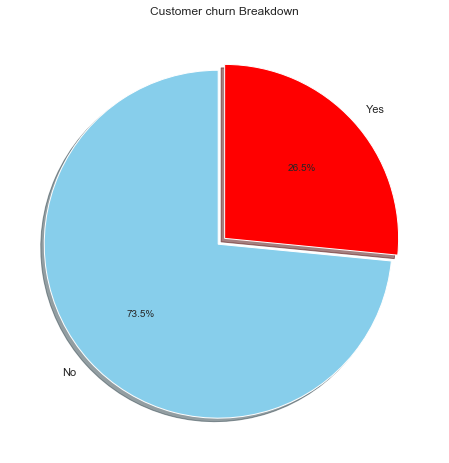

In [135]:
## now lets make a pi plot of the clients who want to churn  and who do not want
labels = df['Churn'].value_counts(sort = True).index 
sizes = df['Churn'].value_counts(sort = True)
exp = [.05 , 0]
col = ['skyblue' ,'red']
plt.figure(figsize = [8,8])
plt.pie(sizes , explode = exp , labels  = labels , colors = col,autopct = '%1.1f%%' , shadow = True , startangle = 90)
plt.title('Customer churn Breakdown')
plt.show()


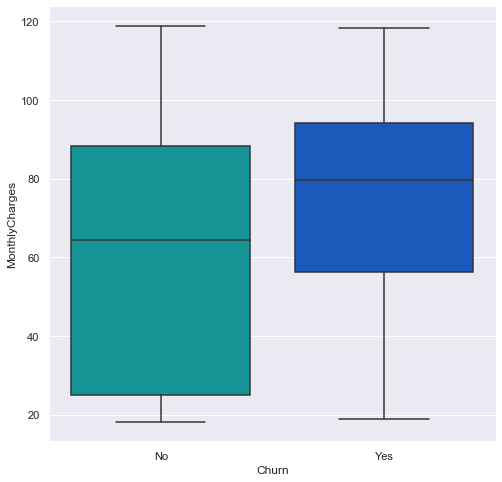

In [136]:
#lets make the box plot in order to determine whether the customer 
# who pay high amount are the ones getting churned or not
plt.figure(figsize =(8,8))

sns.boxplot(x = 'Churn' , y = 'MonthlyCharges' , data = df  , palette = 'winter_r' )
plt.show()
## we can see that customers who are churned are high paying (median is 80) customers


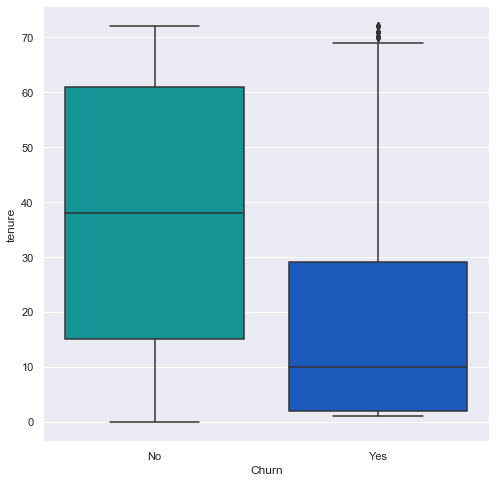

In [137]:
# now lets look at tenure for churn 
plt.figure(figsize =(8,8))

sns.boxplot(x = 'Churn' , y = 'tenure' , data = df  , palette = 'winter_r' )
plt.show()
# customers who are churned have less tenure , its maybe because they were new customers 
#  and were unsatisfied  from the service

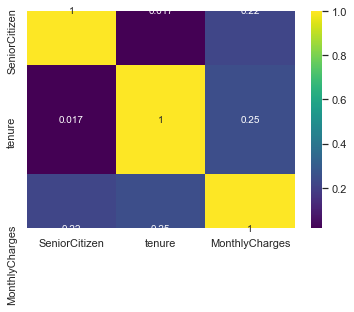

In [138]:
## corelation plot
sns.heatmap(df.corr() , annot = True , cmap ='viridis')
# not strong corlation ammong numerical  columns

### Data Preprocessing

In [139]:
# lets check the unique values 
for i in df.columns:
    
       print(i , df[i].unique())
# not helpful

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [140]:
df2 = df.copy()

In [141]:
# total charges is having the format of object , while it should be in int or float form
# lets convert it 
df2['TotalCharges'] =df2['TotalCharges'].astype(float)

ValueError: could not convert string to float: 

In [142]:
## here we can see data has some empty values , lets check them
len(df2[df2['TotalCharges'] == ' '])
## there are 11 empty values


11

In [153]:
a = df2['TotalCharges']!=' '
np.mean(a) ,a.median() 
## there is not much difference between mean and median 

(0.9984381655544512, 1.0)

In [163]:
# so lets replace it with median  


In [167]:
df2['TotalCharges'] =df2['TotalCharges'].replace(' ' , a.median())

In [171]:
#lets check it
len(df2[df2['TotalCharges'] == ' '])
## replaced it by median

0

In [116]:
## its not much so lets rep it
df['TotalCharges'] =df[df['TotalCharges']!=' ']


In [173]:
from sklearn .preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [183]:
## isolating the columns into multiple categories
# cutomer_id col:
idcol =  ['customerID']
# target column
tar_col  = ['Churn']
# categorical columns , only those columns which have subcategory less  than 6
cat_cols  = df2.nunique()[df2.nunique()<6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in tar_col]
# numerical columns 
num_cols = [x for x in df2.columns if x not in cat_cols + tar_col +idcol]

# binary cols
bin_cols = df2.nunique()[df2.nunique() == 2].keys().tolist()
# columns more than 2 values
multi_cols = [ i for i in cat_cols if i not in bin_cols ]

# label encoding  Binary Columns
le = LabelEncoder()
for i in bin_cols:
    df2[i] = le.fit_transform (df2[i])
# getting dummies for rest of the categorical columns
df2  =pd.get_dummies(data = df2 , columns  = multi_cols)
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [184]:
len(df2.columns)
# now we have 42 columns

42

In [185]:
num_cols  # 3 numerical columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [192]:
# now scaling
sc = StandardScaler()

num_sc = sc.fit_transform(df3[num_cols])
num_sc = pd.DataFrame(num_sc  , columns = num_cols)

#dropping the orignal num cols
df3 = df2.copy()

df2 = df2.drop( columns  = num_cols , axis =1 ) 
df2 = df2.merge(num_sc , left_index = True  , right_index =True , how = 'left')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.992612
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172166
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.958067
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.514251,-0.746535,-0.193673
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.938876


In [193]:
## droping customer_id columns
df2.drop(['customerID'] , axis =1 , inplace = True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.992612
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172166
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.958067
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.514251,-0.746535,-0.193673
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.938876


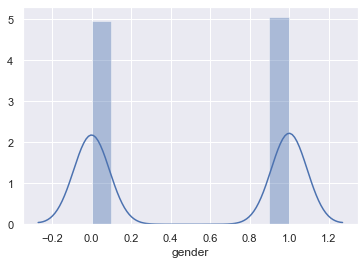

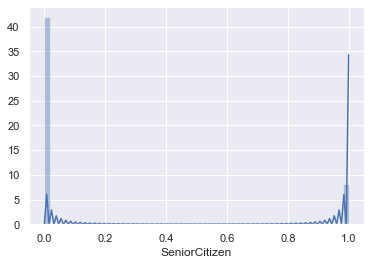

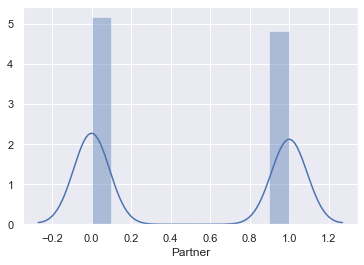

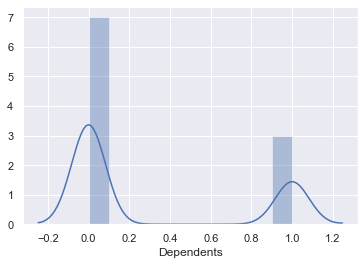

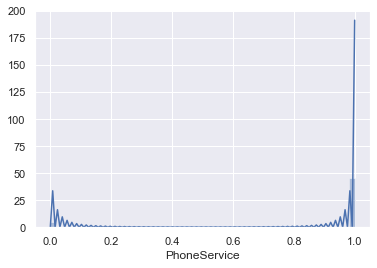

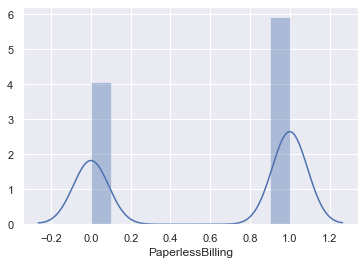

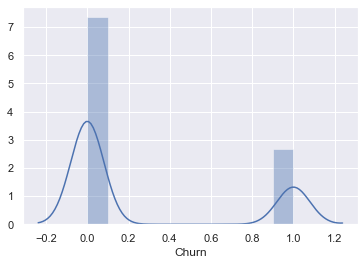

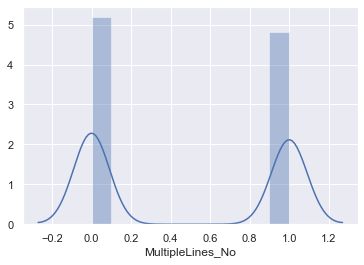

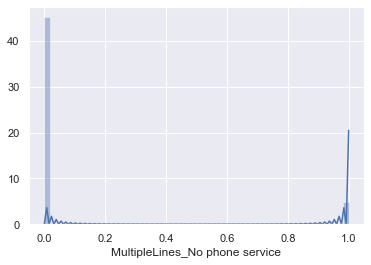

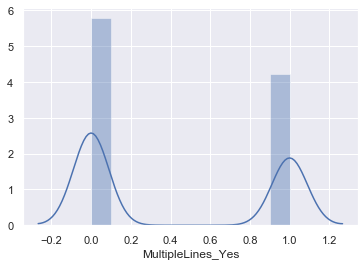

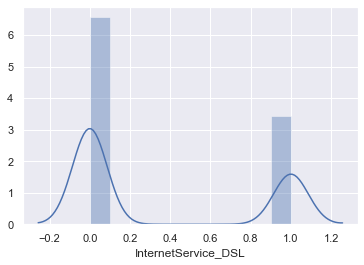

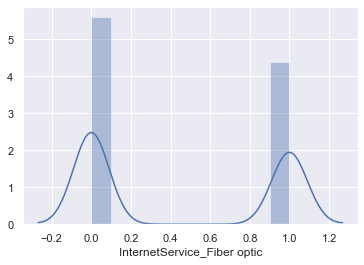

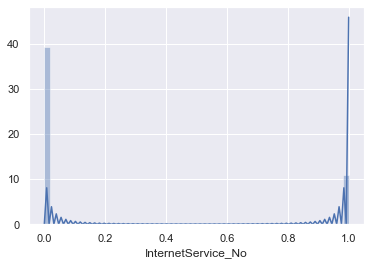

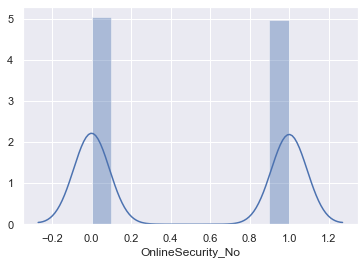

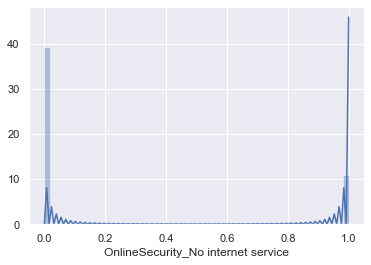

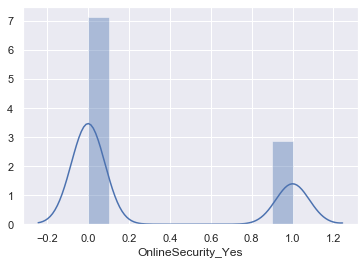

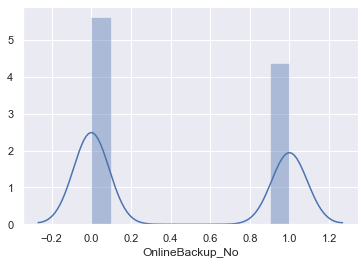

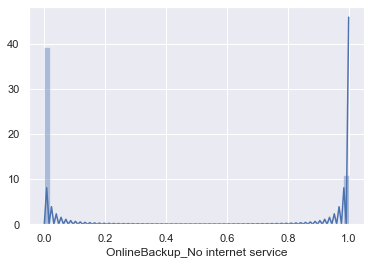

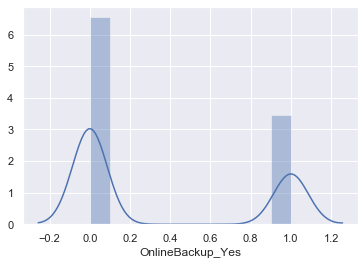

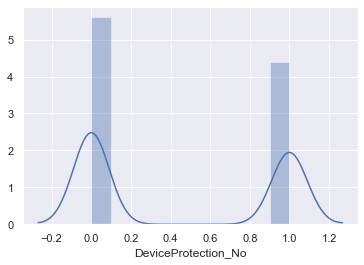

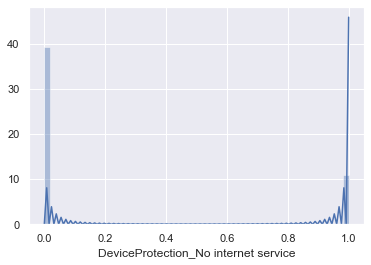

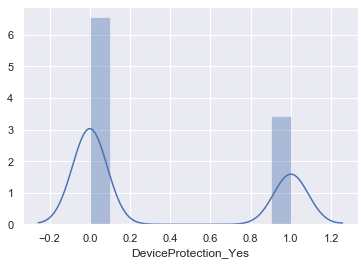

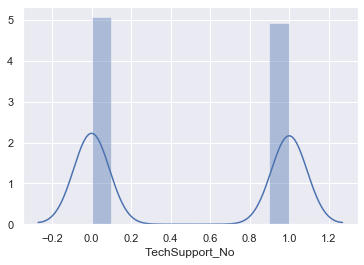

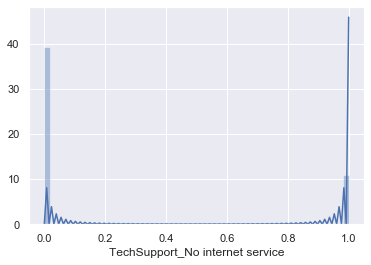

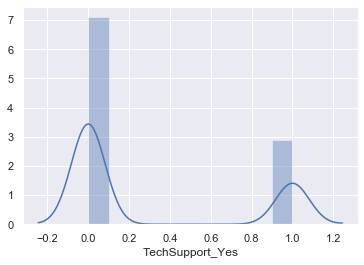

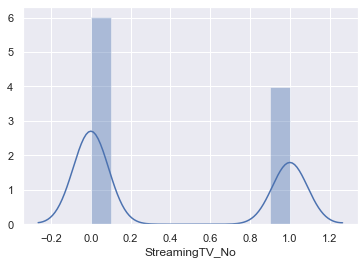

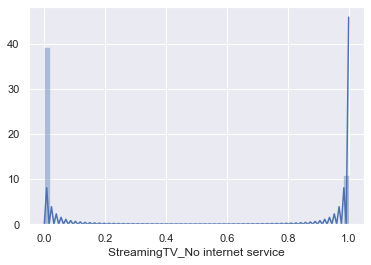

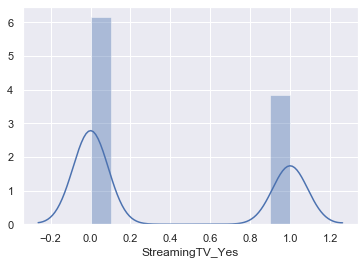

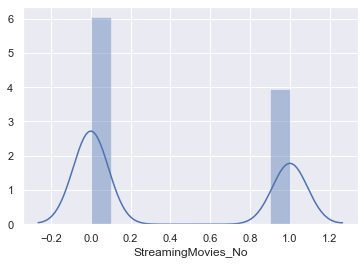

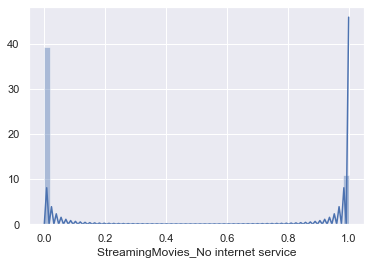

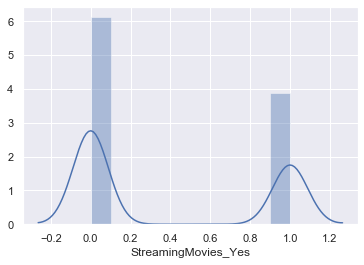

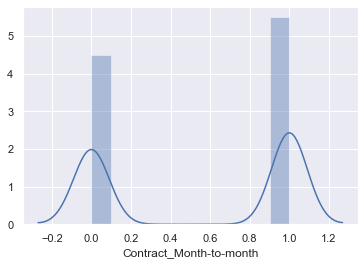

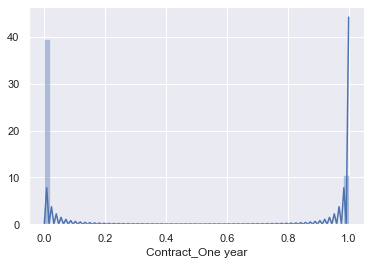

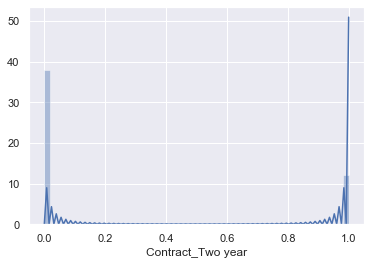

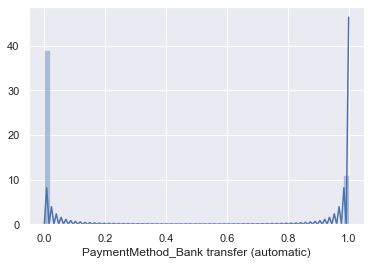

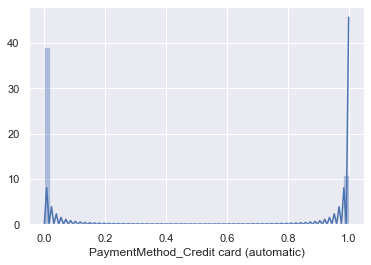

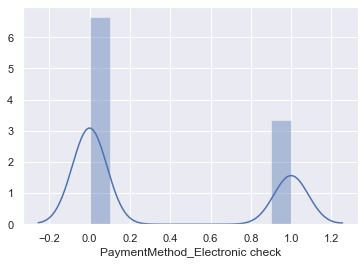

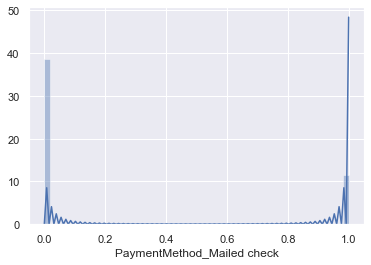

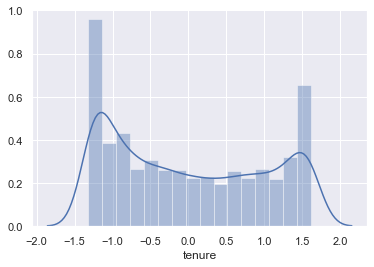

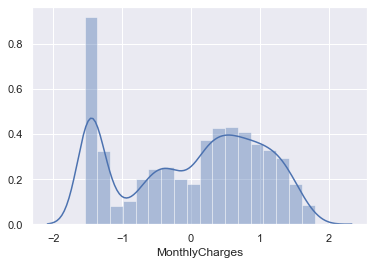

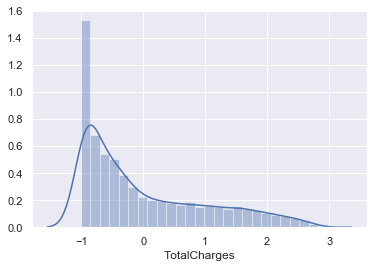

In [194]:
## distplot
for i in df2.columns:
    sns.distplot(df2[i])
    plt.show()

In [195]:
# most of the plots are bimodal or they are categorical in nature , apart from that numerical columns are skewed in nature 
# hence not following the normal distribution 

### Modelling 

In [202]:
from sklearn.model_selection import train_test_split

X = df2.drop('Churn' , axis =1)
y = df2['Churn']

In [203]:
xtrain ,xtest,ytrain , ytest = train_test_split(X , y , test_size = 0.3  , random_state = 0)
xtrain.shape ,xtest.shape,ytrain.shape , ytest.shape

((4930, 40), (2113, 40), (4930,), (2113,))

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
score = model.score(xtest, ytest)

print("Accuracy = " + str(score))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy = 0.8021769995267393
[[1396  164]
 [ 254  299]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.65      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [ ]:
## model overall accuracy is good but for minority class its not performing that much good 
# as we can see precision recall score is low for  class 1

In [242]:
### feature importance using Logestic regression 
## lets sort on the co-efficients with the largest weights as  those impact the resulting output the most
coef   = model.coef_[0]
coef  = [abs(number) for number in coef]
coef


[0.06496692745687223,
 0.24616664881934439,
 0.02962998307391615,
 0.2256125728297342,
 0.22799234639747415,
 0.3313542654361027,
 0.28779965151962195,
 0.2272550998068187,
 0.059807305122135376,
 0.26663348756611177,
 0.3120027946104536,
 0.04610655363503374,
 0.2328409163839484,
 0.04610655363503374,
 0.18747160933957902,
 0.17101841225354614,
 0.04610655363503374,
 0.1256491052091649,
 0.02919413235818613,
 0.04610655363503253,
 0.016175174686173858,
 0.18883242365014113,
 0.04610655363503374,
 0.14346311660577946,
 0.06333759127010503,
 0.04610655363503374,
 0.10870689831444226,
 0.021802623797029325,
 0.04610655363503253,
 0.06717193084138119,
 0.7188238011268805,
 0.0662442970550946,
 0.6533167506624564,
 0.06986843279519091,
 0.18201433754540963,
 0.2885192843084826,
 0.03737376055856987,
 1.3588095627596823,
 0.18204116303737328,
 0.5764164735148178]

In [243]:
cols  =list( df2.columns)
cols.index('Churn')

6

In [244]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [245]:
## sorting on feature importance basis
sorted_index = sorted(range(len(coef)) , key = lambda k : coef[k] , reverse = True)
sorted_index

[37,
 30,
 32,
 39,
 5,
 10,
 35,
 6,
 9,
 1,
 12,
 4,
 7,
 3,
 21,
 14,
 38,
 34,
 15,
 23,
 17,
 26,
 33,
 29,
 31,
 0,
 24,
 8,
 11,
 13,
 16,
 22,
 25,
 19,
 28,
 36,
 2,
 18,
 27,
 20]

In [246]:

for idx in sorted_index:
    print(cols[idx])

tenure
Contract_Month-to-month
Contract_Two year
TotalCharges
PaperlessBilling
InternetService_Fiber optic
PaymentMethod_Electronic check
MultipleLines_No
InternetService_DSL
SeniorCitizen
OnlineSecurity_No
PhoneService
MultipleLines_No phone service
Dependents
TechSupport_No
OnlineSecurity_Yes
MonthlyCharges
PaymentMethod_Credit card (automatic)
OnlineBackup_No
TechSupport_Yes
OnlineBackup_Yes
StreamingTV_Yes
PaymentMethod_Bank transfer (automatic)
StreamingMovies_Yes
Contract_One year
gender
StreamingTV_No
MultipleLines_Yes
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
TechSupport_No internet service
StreamingTV_No internet service
DeviceProtection_No internet service
StreamingMovies_No internet service
PaymentMethod_Mailed check
Partner
DeviceProtection_No
StreamingMovies_No
DeviceProtection_Yes


###  Naive bayes

In [275]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain , ytrain)

ypred = nb.predict(xtest)
score = nb.score(xtest ,ytest)

print('Accuracy = ' , score)
print(confusion_matrix(ytest , ypred))
print(cr(ytest, ypred))
## score is low compare to logisitic model

Accuracy =  0.6990061523899669
[[1020  540]
 [  96  457]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1560
           1       0.46      0.83      0.59       553

    accuracy                           0.70      2113
   macro avg       0.69      0.74      0.68      2113
weighted avg       0.79      0.70      0.72      2113



### Random Forest Classifier

In [253]:
from sklearn.ensemble import RandomForestClassifier

cr = classification_report
rf = RandomForestClassifier()
rf.fit(xtrain , ytrain)

ypred = rf.predict(xtest)
score = rf.score(xtest ,ytest)

print('Accuracy = ' , score)
print(confusion_matrix(ytest , ypred))
print(cr(ytest, ypred))


Accuracy =  0.7875059157595835
[[1395  165]
 [ 284  269]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1560
           1       0.62      0.49      0.55       553

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [254]:
## test score became more poor  for minority class 
# also overall accuracy fell down by 1 percent 

### XGB Classifier

In [257]:
from xgboost import XGBClassifier
xgc = XGBClassifier()

xgc.fit(xtrain , ytrain)

ypred = xgc.predict(xtest)
score = xgc.score(xtest ,ytest)

print('Accuracy = ' , score)
print(confusion_matrix(ytest , ypred))
print(cr(ytest, ypred))


Accuracy =  0.7903454803596782
[[1376  184]
 [ 259  294]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1560
           1       0.62      0.53      0.57       553

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [258]:
## as we can see ensemble model is performing poorly  compared to our base model 
## lets first try damension reduction 

In [259]:
from sklearn.decomposition import PCA
## aplying pca on X after that we will do train test split again 

In [261]:
pca = PCA()
pca.fit(X)



PCA()

In [263]:
## number of components explaining the variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.31301376, 0.5159484 , 0.59062007, 0.63323143, 0.66791953,
       0.69772077, 0.72656705, 0.75382564, 0.77992717, 0.80439552,
       0.8280615 , 0.84990147, 0.87081605, 0.89161427, 0.91188062,
       0.93073022, 0.94780297, 0.96148245, 0.97389683, 0.98571567,
       0.99489059, 0.99994769, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [265]:
## 98 % of variance is explained  by how much pca component
d = np.argmax(cumsum >=.98)+1
d
## out of 41 pca's we need only 20 components

20

In [267]:
pca = PCA(n_components = .98)
x_red = pca.fit_transform(X)
x_red

array([[-1.30389195, -1.75074547,  1.2747406 , ...,  0.33044658,
         0.32807739,  0.1586266 ],
       [-0.31231588, -0.25899646,  1.45218323, ..., -0.287633  ,
        -0.18641368,  0.15156494],
       [-1.16036955, -1.53684144,  1.12858016, ..., -0.31458625,
        -0.25111206,  0.14903589],
       ...,
       [-1.19728367, -1.39480647,  1.69176607, ...,  0.28278575,
         0.60360696, -0.27583989],
       [-0.38721968, -2.06973403, -0.33599051, ...,  0.64972606,
        -0.22762529,  0.8410989 ],
       [ 2.72140508,  1.35193395, -0.2550796 , ..., -0.13106301,
         0.50600708, -0.01845949]])

In [271]:
y 


array([0, 0, 1, ..., 0, 1, 0])

In [272]:
# now do train test split
xtrain1 ,xtest1 ,ytrain1 ,ytest1 = train_test_split(x_red , y , test_size = 0.3 , random_state = 0)

In [ ]:
#Lets apply models now on these


In [273]:
## random forest
from sklearn.ensemble import RandomForestClassifier

cr = classification_report
rf = RandomForestClassifier()
rf.fit(xtrain1 , ytrain1)

ypred = rf.predict(xtest1)
score = rf.score(xtest1 ,ytest1)

print('Accuracy = ' , score)
print(confusion_matrix(ytest1 , ypred))
print(cr(ytest1, ypred))
## no improvement in scores

Accuracy =  0.7799337434926644
[[1400  160]
 [ 305  248]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1560
           1       0.61      0.45      0.52       553

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [274]:
## xgb classifier
from xgboost import XGBClassifier
xgc = XGBClassifier()

xgc.fit(xtrain1 , ytrain1)

ypred = xgc.predict(xtest1)
score = xgc.score(xtest1 ,ytest1)

print('Accuracy = ' , score)
print(confusion_matrix(ytest1 , ypred))
print(cr(ytest1, ypred))


Accuracy =  0.7747278750591576
[[1370  190]
 [ 286  267]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1560
           1       0.58      0.48      0.53       553

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.77      2113



In [ ]:
## still poorly performing  PCA is of no help
## but we can still look for hyper parameter tunning  and cross validation techniques


### Grid Search CV 


In [280]:
from sklearn.model_selection import GridSearchCV ,KFold 

In [296]:
param = {'n_estimators' : np.arange(1,40) , 'max_depth' :np.arange(1,10) ,'criterion' : ['gini' , 'entropy'] }

In [297]:
rf = RandomForestClassifier()
gs = GridSearchCV( rf , param ,  cv =5 , scoring = 'roc_auc')
gs.fit(xtrain , ytrain)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='roc_auc')

In [298]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 34}

In [303]:
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 5, n_estimators = 34)

cr = classification_report

rf.fit(xtrain , ytrain)

ypred = rf.predict(xtest)
score = rf.score(xtest ,ytest)

print('Accuracy = ' , score)
print(confusion_matrix(ytest , ypred))
print(cr(ytest, ypred))
## accuracy is still poor for minority class


Accuracy =  0.7946048272598202
[[1450  110]
 [ 324  229]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1560
           1       0.68      0.41      0.51       553

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113



In [ ]:
# precision improved but recall fell down

In [304]:
## xgb classfier
param = {'min_samples_leaf' :10 , 'max_depth' : 8 , 'n_estimators':np.arange(1,10)}

In [306]:
xgb = XGBClassifier()
gs = GridSearchCV( xgb , param ,  cv =5 , scoring = 'roc_auc' , n_jobs = -1)
gs.fit(xtrain , ytrain)


[19:59:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [307]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 38}

In [311]:
from xgboost import XGBClassifier
xgc = XGBClassifier(criterion = 'gini' , max_depth = 1, n_estimators = 38)

xgc.fit(xtrain , ytrain)

ypred = xgc.predict(xtest)
score = xgc.score(xtest ,ytest)

print('Accuracy = ' , score)
print(confusion_matrix(ytest , ypred))
print(cr(ytest, ypred))

[20:05:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy =  0.8045433033601515
[[1415  145]
 [ 268  285]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1560
           1       0.66      0.52      0.58       553

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [ ]:
## might not be the appropriate way to impliment the grid search cv for xgbclassifier
# scores improved  littile bit 

In [ ]:
## scores for minority classes
[1       0.65      0.54      0.59       553]  lr
[ 1       0.46      0.83      0.59       553] nb
[1       0.62      0.49      0.55       553] rfc
[1       0.62      0.53      0.57       553] xgb
[ 1       0.68      0.41      0.51       553] rfc grid
[1       0.66      0.52      0.58       553] xgc grid
# as we can see logistic is performing well comapritively well

###  SVM Classifier

In [312]:
from sklearn import svm

In [313]:
sv = svm.SVC(kernel = 'linear')
sv.fit(xtrain , ytrain )
ypred = sv.predict(xtest)
print(cr(ytest , ypred) )
#

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.64      0.52      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane

Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

In [322]:
sv = svm.SVC(kernel = 'rbf' , C= 1.0 , gamma = 'scale'  )
sv.fit(xtrain , ytrain )
ypred = sv.predict(xtest)
print(cr(ytest , ypred) )


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1560
           1       0.65      0.50      0.56       553

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [324]:
## as we know we have to make trade off between precison and recall ,  scores we are getting after implimentation of SVM is slightly less then Logistic rregression
#  there are many combination which can be explored , pca diamensionality  reduction didn't work out well 
# however we can apply variation inflation factor to reduce the diamension and recheck our model's clssification report